# Map and Graph and Stuff
This notebook uses the completegaybizdf, which has all the gay businesses identified from the reviews and the ones identified manually. The df includes a summary of which gay words were identified in the review and some basic information about the business.

In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns

In [6]:
# Load in completegaybiz
df = pd.read_pickle('data/completegaybiz.pandas')

In [7]:
# turn into a geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, 
                                          crs='EPSG:4326'))

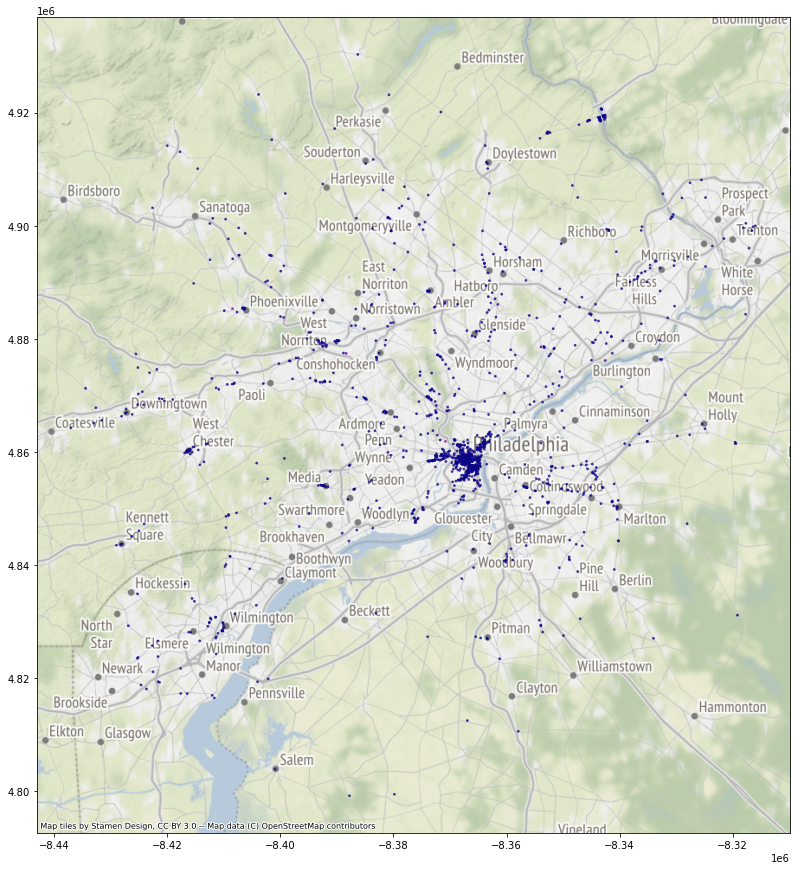

In [40]:
# plot
fig, ax = plt.subplots(figsize=(15,15))
gdf.to_crs('EPSG: 3857').plot(ax=ax, column = 'gay_text_len', cmap = 'plasma', alpha = 0.7, markersize = 3)

ctx.add_basemap(ax, alpha = 0.7)

In [41]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [42]:
df

business_id  \
0     wPi7p5fZyGTOjDU28IlTqA   
1     FhwTEGqdir75uyXZqWqxlw   
2     ZH41CKIlAZrrQD-DMV2TWA   
3     4FHXsFTyvvxc-pISdYkoeQ   
4     IORvbG2rAIVJ-1d148cCmg   
5     HCN3XWVqv04fws8vkC4H7w   
6     8FALz8g6oaTca0ufiUuF6w   
7     aMIRfasPN_HCYdR4lQqzDA   
8     CeNiaICi59dWhfzfKnh8lQ   
9     K7mOK-0Fcrc6LUXsgfPoFQ   
10    FCBrbR6GpRop7DCMQ1tpZA   
11    S6q5t-TGc_je8ssh06zTYw   
12    ELZjb4effPxfDfdXqE_sKw   
13    a8Dd8uNFxfQjCSKpkP34HQ   
14    hq0pGGIfaqBG36518UsWcw   
15    szdH65mQam5lNncCfJLUwA   
16    akt1rURvNVAI9sfQfr-5lg   
17    1myhYEZ2EC98hrNMw7KAqg   
18    omxGWadAwux6OmllqOzeWg   
19    2yqHhAnxqEHBcdky3jq1VA   
20    m-5N-fwCIGK5NWMclTqOUw   
21    zuNEmJXTIAMRwRY5v-oSCg   
22    p6H295aQCbDJ80GcpqFvwA   
23    hsslqZAVtu093rkguSpltA   
24    -IZpkWsJKfq35eJLzaUcvA   
25    io4YNLvABJrFraEwtQBWqA   
26    qdiuVbeHgis5LOgDJMBfcw   
27    zwTmOj4B_OVPMTMYijQiKg   
28    gc7TPAFaPdJD2Aa_yF10OA   
29    yooufdsf3eAVq_9RQNSDJA   
30    A9El2DdT9Qx2tfFc_f279A   
31    ZPn4D4aD3pcVKFjjjTqSgw   
32    PWtFbiNsrO5rn67KWWWGrg   
33    cRJIf2i9LX8X8DKDG2qjiQ   
34    wQWhY5vA3ESMh6qFHMYvrg   
35    sy7ADvpBA7SfHwbY-Y_5gw   
36    LsMs0NL9jBukdsPqTP-sOA   
37    bRhnVTfuxDchyFguyDzuDQ   
38    u0NAXvm0bzES97r9IdF4Qg   
39    RBrjw9lwqkSwLUw1hZgGBw   
40    8OoLxv91ztELwzfvG26xjA   
41    ZdMr2rrZAYfPVewtd29ifw   
42    Hwq3zoAbv8kWrCRWzK4_7w   
43    7cpj7hjDTX5fb-6pYcZiGQ   
44    3QPAh9VvYNTnqAFgBeBcng   
45    A4fbwssaFFh60rNYjKGzag   
46    04UD14gamNjLY0IDYVhHJg   
47    LzVvcVm48zYIcQnwLKt1oA   
48    Q8vKIek2YD0MESa-9mttGw   
49    1fGaY2WlGv2l4as6UkMFrg   
50    qQO7ErS_RAN4Vs1uX0L55Q   
51    s1PNBO9o5jIgNd5YWUDLXQ   
52    S-VD26LE_LeJNx5nASk_pw   
53    JUQG2g3KYK6nbEuKNSxWiA   
54    btO6x9iGY4KiP4DpOf0TPg   
55    -QI8Qi8XWH3D8y8ethnajA   
56    hEMNTKjcnhHxw9NRprl3Jw   
57    D5V0Fawd6ODVgqCY8xngsw   
58    7Uju6dZG11IV-veCyJ6lgQ   
59    aCahbvq6zBX2jUReMlJq6Q   
60    BmRiZG7YUTQ1lfK61J6zLA   
61    -kX4WpZWN_6Xp2mVsYoKVg   
62    YGVBacpj1YW4q69hlYKoVA   
63    R49ZLFHn9fhEwPCh2FQeDA   
64    Rzx2E5XgTeGU7FEbUZ-bGg   
65    L4xQO6dGB193NuuY4_PkGA   
66    WtshUxJurSLWfEkdciY0gw   
67    vVfy055EfLMdd0yJYHxiMQ   
68    AGlh4ZDv6jnoiYfz7At9mw   
69    M54YgTqNenGObSv1opsGEg   
70    D4QXsX1dKYTb2W5nUnAStA   
71    1Bby_pb1ZBojRRcslDk1gA   
72    iuhVHYdex7ImvXyn9V0pNQ   
73    rAUaBd1BMOrY9K6kZzcEEw   
74    8pqdJjefYq-a9IBSJJmKwA   
75    jTI5Xjk27An8ceJ6VwpXiQ   
76    w5wfWE6skJDi_-mS56DB-g   
77    2er_V-oAd7IbQ5YTY56r7A   
78    lZX5_8qspEXtMJGFQ0-Mow   
79    fJhOwBljOz3VJV-BhCB3hg   
80    bTve2mwLk5Zc01vRKqc2KQ   
81    72RtdjlVLaVedeXvowj04w   
82    R8SpLHPAsLMuvU0b_96sDA   
83    VG5wOdj4Z9-xBWJ9xebQMw   
84    lPPFfaAxzyj8R3dr9kasbg   
85    2oav5QoWgnvTI2gO5xFMjw   
86    cOXc8c85Ms6dMEAJazLXHQ   
87    XTVlIRK2X9XYGCv-1OiaFw   
88    JHRlwxxKY0JJcU97rJ-Bug   
89    q43nr6E8ib2p39sVYtPGww   
90    j4LsDsafYcTS_CmBykdSzA   
91    yypfHgPJw6V65cLTOZiPSQ   
92    UI5BLWUDxp4izbq7Tuy6Iw   
93    0K4RwxdAcViifyU3Htzxww   
94    ytynqOUb3hjKeJfRj5Tshw   
95    PP3BBaVxZLcJU54uP_wL6Q   
96    FXj02QYnpbLGzR5MGW_LHw   
97    1yuSWypzGewvhNZSwUlvPw   
98    yW0DwYGKyZjBNOvingjKzw   
99    BM92j54mc-c-6MWqWSimRw   
100   vOzo4wlUNty2NQuylDrqKA   
101   fP1RDTTf6gIgY5w0l1ediQ   
102   FbMWMAcJz0bzK3dizVNb-A   
103   1Yofayi8dJOHr487Iwgnxg   
104   Ku2b7oA9s56mHoflb5lJ2w   
105   IkY2ticzHEn4QFn8hQLSWg   
106   23H5J1Y5rRMLU8dMxN7EPA   
107   f8Byv8pegvus-Wud_mf0_Q   
108   911Zlr47_jGbqa1KRs8xqg   
109   r0570Yv6oJaKrMwXQZd7sg   
110   jXtaxB2b64nA4uy13i024A   
111   jZ7YdEW_VbWk2CbiG4Fsjw   
112   PYUI1OJVksGUbCrteU68bw   
113   2T5t9DguNoYQAoTpA_8mcw   
114   xv_e8FRaJOJXfa_Fe8zQwA   
115   Knk5_SDSCx7slFb2rtBgOw   
116   qI7j_4UGb3w6f9j5c7lC6Q   
117   _8GP2wBnG2CdmZKHmpz8ng   
118   4XJjKRpkqLlErQ6brEeKHA   
119   tK_opQ0TuwhGDc5wadVq5A   
120   RQAF6a0akMiot5lZZnMNNw   
121   02nb6CI8w-2EoSEkQdk2Wg   
122   NgUst1ex3M2ibDzSb6Xkaw   
123   lQwSrnzTxhssWHRGyq5rvQ   
124   BAaU9XVWHtS